In [146]:
%load_ext autoreload
from ddls.plotting.plotting import PlotAesthetics
from ddls.environments.ramp_cluster.ramp_cluster_environment import RampClusterEnvironment
from ddls.environments.ramp_cluster.utils import load_ramp_cluster_environment_metrics
from ddls.utils import map_agent_id_to_hparams

from collections import defaultdict
from sqlitedict import SqliteDict
import pprint
import glob
import os
import time
import pandas as pd
import numpy as np
import scipy.stats as st
import sigfig

import gzip
import pickle

from omegaconf import OmegaConf
from functools import reduce

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [147]:
%autoreload
from ddls.environments.ramp_cluster.utils import load_ramp_cluster_environment_metrics_from_wandb_sweep

agent_to_sweep = {
    
    # # AcceptableJCT vs. SiPML across different loads (3 seeds) with total_node_bandwidth=6e9
    # 'SiP-ML$_{max}$': 'ong/ddls-scripts/xtt0fbpj',
    # 'SiP-ML$_{min}$': 'ong/ddls-scripts/r0l0680b',
    
    # # AcceptableJCT vs. SiPML across different loads (3 seeds) with total_node_bandwidth=1.6e12
    # 'SiP-ML$_{max}$': 'ong/ddls-scripts/zuya969g',
    # 'SiP-ML$_{min}$': 'ong/ddls-scripts/z1j0gijv',
    
    # # AcceptableJCT vs. SiPML across different loads (3 seeds) with total_node_bandwidth=25e9
    # 'SiP-ML$_{max}$': 'ong/ddls-scripts/wxubm3ud',
    # 'SiP-ML$_{min}$': 'ong/ddls-scripts/dolw2fp8',
    
    # # AcceptableJCT vs. SiPML across different loads (3 seeds) with total_node_bandwidth=12.5e9
    # 'SiP-ML$_{max}$': 'ong/ddls-scripts/fmwcrjoi',
    # 'SiP-ML$_{min}$': 'ong/ddls-scripts/rfq70jkb',
    
    # AcceptableJCT vs. SiPML across different loads (3 seeds) with total_node_bandwidth=3.125e9
    'SiP-ML$_{max}$': 'ong/ddls-scripts/l4p6y2we',
    'SiP-ML$_{min}$': 'ong/ddls-scripts/a5oenf01',
    
}

keys_to_ignore = ['valid/step_stats/'] # for ignoring data not needed for plotting
key_substrings_to_remove = ['valid/episode_stats/'] # for tidying up keys

verbose = False




agent_to_episode_stats_dict, agent_to_episode_completion_stats_dict, agent_to_episode_blocked_stats_dict = load_ramp_cluster_environment_metrics_from_wandb_sweep(agent_to_sweep, keys_to_ignore=keys_to_ignore, key_substrings_to_remove=key_substrings_to_remove, verbose=verbose)
        
# convert dicts to dataframes
# print(f'\nEpisode stats:')
# for key, val in agent_to_episode_stats_dict.items():
#     print(f'key {key} -> {len(val)} vals')
episode_stats_df = pd.DataFrame(agent_to_episode_stats_dict)
display(episode_stats_df)

episode_completion_stats_df = pd.DataFrame(agent_to_episode_completion_stats_dict)
display(episode_completion_stats_df)

episode_blocked_stats_df = pd.DataFrame(agent_to_episode_blocked_stats_dict)
display(episode_blocked_stats_df)


Agent SiP-ML$_{max}$ sweep <Sweep ong/ddls-scripts/l4p6y2we (FINISHED)> parameters:
	eval_loop.env.jobs_config.job_interarrival_time_dist.val:
		{'values': [50, 100, 200, 400, 600, 800, 1000, 1250, 1500, 2000, 3000, 6000, 12000]}
	experiment.seed:
		{'values': [0, 1, 2]}
Loading data from 39 runs...
Loaded data for run 1 of 39 (<Run ong/ddls-scripts/bm4x0l50 (finished)>) in 0.425.
Loaded data for run 2 of 39 (<Run ong/ddls-scripts/d3xts3jd (finished)>) in 0.427.
Loaded data for run 3 of 39 (<Run ong/ddls-scripts/u7j3n9v9 (finished)>) in 0.439.
Loaded data for run 4 of 39 (<Run ong/ddls-scripts/by140wj6 (finished)>) in 0.406.
Loaded data for run 5 of 39 (<Run ong/ddls-scripts/lyxssu1a (finished)>) in 0.420.
Loaded data for run 6 of 39 (<Run ong/ddls-scripts/a5n35hm3 (finished)>) in 0.418.
Loaded data for run 7 of 39 (<Run ong/ddls-scripts/iooqptmy (finished)>) in 0.427.
Loaded data for run 8 of 39 (<Run ong/ddls-scripts/8npdgchv (finished)>) in 0.426.
Loaded data for run 9 of 39 (<Run 

wandb: WARNING A graphql request initiated by the public wandb API timed out (timeout=9 sec). Create a new API with an integer timeout larger than 9, e.g., `api = wandb.Api(timeout=19)` to increase the graphql timeout.


Loaded data for run 36 of 39 (<Run ong/ddls-scripts/l6vcuoma (finished)>) in 10.456.
Loaded data for run 37 of 39 (<Run ong/ddls-scripts/ovc6tu8o (finished)>) in 0.415.
Loaded data for run 38 of 39 (<Run ong/ddls-scripts/z483r9ch (finished)>) in 0.443.
Loaded data for run 39 of 39 (<Run ong/ddls-scripts/wilr2fy5 (finished)>) in 0.447.
Loaded data for agent SiP-ML$_{max}$ sweep <Sweep ong/ddls-scripts/l4p6y2we (FINISHED)> (num_runs=39) in 1664921579.381 s.

Agent SiP-ML$_{min}$ sweep <Sweep ong/ddls-scripts/a5oenf01 (FINISHED)> parameters:
	eval_loop.env.jobs_config.job_interarrival_time_dist.val:
		{'values': [50, 100, 200, 400, 600, 800, 1000, 1250, 1500, 2000, 3000, 6000, 12000]}
	experiment.seed:
		{'values': [0, 1, 2]}
Loading data from 39 runs...
Loaded data for run 1 of 39 (<Run ong/ddls-scripts/dzv65uhe (finished)>) in 0.444.
Loaded data for run 2 of 39 (<Run ong/ddls-scripts/4ao48nh3 (finished)>) in 0.417.
Loaded data for run 3 of 39 (<Run ong/ddls-scripts/1667k0up (finished)>)

,dep_info_processed,num_jobs_arrived,blocking_rate,episode_end_time,mean_demand_total_throughput,compute_info_processed,num_jobs_blocked,mean_demand_compute_throughput,episode_time,demand_dep_info_processed,...,demand_total_info_processed,mean_dep_throughput,cluster_info_processed,mean_compute_throughput,mean_load_rate,mean_cluster_throughput,Agent,config,eval_loop.env.jobs_config.job_interarrival_time_dist.val,experiment.seed
0,8.873428e+12,84,0.035714,1000000,2.306130e+06,1.145093e+12,3,1.145093e+06,1000000,1.161038e+12,...,2.306130e+12,8.873428e+06,1.001852e+13,1.145093e+06,2.432055e+06,1.001852e+07,SiP-ML$_{max}$,"{""wandb"": {""value"": {""init"": {""entity"": ""ong"",...",12000,2
1,8.042596e+12,84,0.035714,1000000,2.083683e+06,1.037594e+12,3,1.037594e+06,1000000,1.046089e+12,...,2.083683e+12,8.042596e+06,9.080190e+12,1.037594e+06,2.177645e+06,9.080190e+06,SiP-ML$_{max}$,"{""wandb"": {""value"": {""init"": {""entity"": ""ong"",...",12000,1
2,9.450193e+12,84,0.023810,1000000,2.441591e+06,1.208595e+12,2,1.208595e+06,1000000,1.232996e+12,...,2.441591e+12,9.450193e+06,1.065879e+13,1.208595e+06,2.534282e+06,1.065879e+07,SiP-ML$_{max}$,"{""wandb"": {""value"": {""init"": {""entity"": ""ong"",...",12000,0
3,1.855486e+13,167,0.011976,1000000,4.885351e+06,2.413374e+12,2,2.413374e+06,1000000,2.471977e+12,...,4.885351e+12,1.855486e+07,2.096823e+13,2.413374e+06,4.995545e+06,2.096823e+07,SiP-ML$_{max}$,"{""wandb"": {""value"": {""init"": {""entity"": ""ong"",...",6000,2
4,1.803257e+13,167,0.023952,1000000,4.649390e+06,2.312646e+12,4,2.312646e+06,1000000,2.336744e+12,...,4.649390e+12,1.803257e+07,2.034522e+13,2.312646e+06,4.841537e+06,2.034522e+07,SiP-ML$_{max}$,"{""wandb"": {""value"": {""init"": {""entity"": ""ong"",...",6000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,2.042249e+13,10001,0.911909,1000000,2.711184e+07,1.343753e+13,9120,1.343753e+07,1000000,1.367431e+13,...,2.711184e+13,2.042249e+07,3.386002e+13,1.343753e+07,3.156316e+08,3.386002e+07,SiP-ML$_{min}$,"{""wandb"": {""value"": {""init"": {""entity"": ""ong"",...",100,1
74,1.948802e+13,10001,0.915808,1000000,2.607187e+07,1.292116e+13,9159,1.292116e+07,1000000,1.315070e+13,...,2.607187e+13,1.948802e+07,3.240918e+13,1.292116e+07,3.157679e+08,3.240918e+07,SiP-ML$_{min}$,"{""wandb"": {""value"": {""init"": {""entity"": ""ong"",...",100,0
75,2.068135e+13,20001,0.955652,1000000,2.788460e+07,1.376019e+13,19114,1.376019e+07,1000000,1.412441e+13,...,2.788460e+13,2.068135e+07,3.444154e+13,1.376019e+07,6.312711e+08,3.444154e+07,SiP-ML$_{min}$,"{""wandb"": {""value"": {""init"": {""entity"": ""ong"",...",50,2
76,2.123749e+13,20001,0.953552,1000000,2.814721e+07,1.400396e+13,19072,1.400396e+07,1000000,1.414324e+13,...,2.814721e+13,2.123749e+07,3.524145e+13,1.400396e+07,6.310767e+08,3.524145e+07,SiP-ML$_{min}$,"{""wandb"": {""value"": {""init"": {""entity"": ""ong"",...",50,1


,jobs_completed_max_partitions_per_op,job_communication_overhead_time,jobs_completed_original_demand_num_nodes,jobs_completed_num_edges,job_computation_overhead_time,jobs_completed_max_acceptable_job_completion_time_frac,jobs_completed_original_demand_total_operation_memory_cost,jobs_completed_max_acceptable_job_completion_time,jobs_completed_job_sequential_completion_time,jobs_completed_original_demand_num_edges,...,jobs_completed_total_dependency_size,job_completion_time_speedup,jobs_completed_total_operation_memory_cost,jobs_completed_num_mounted_channels,jobs_completed_mean_mounted_worker_utilisation_frac,jobs_completed_num_mounted_workers,Agent,config,eval_loop.env.jobs_config.job_interarrival_time_dist.val,experiment.seed
0,16.000000,1640.753463,99.851852,23503.086420,1771.918851,0.543580,1.391739e+10,15172.951654,28138.990123,112.160494,...,1.076915e+11,10.042419,1.391739e+10,285.629630,5.275763e+05,17.296296,SiP-ML$_{max}$,"{""wandb"": {""value"": {""init"": {""entity"": ""ong"",...",12000,2
1,16.000000,1495.944290,91.777778,21930.320988,1839.970889,0.556667,1.253448e+10,16465.281827,29257.598148,102.358025,...,9.733946e+10,10.487751,1.253448e+10,279.111111,4.689686e+05,17.111111,SiP-ML$_{max}$,"{""wandb"": {""value"": {""init"": {""entity"": ""ong"",...",12000,1
2,16.000000,1773.477429,103.268293,25772.939024,1870.554518,0.574268,1.473897e+10,16997.329567,29746.165244,115.439024,...,1.152463e+11,9.771728,1.473897e+10,276.487805,5.807133e+05,17.036585,SiP-ML$_{max}$,"{""wandb"": {""value"": {""init"": {""entity"": ""ong"",...",12000,0
3,16.000000,1703.307928,100.860606,24415.151515,1834.240945,0.563636,1.462651e+10,16663.470897,29135.508182,113.060606,...,1.124537e+11,9.950050,1.462651e+10,275.200000,5.605263e+05,17.000000,SiP-ML$_{max}$,"{""wandb"": {""value"": {""init"": {""entity"": ""ong"",...",6000,2
4,16.000000,1714.337838,97.484663,23460.073620,1818.221554,0.577607,1.418801e+10,17061.878613,28897.610736,108.938650,...,1.106293e+11,9.976325,1.418801e+10,276.711656,5.220912e+05,17.042945,SiP-ML$_{max}$,"{""wandb"": {""value"": {""init"": {""entity"": ""ong"",...",6000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,1.994318,1056.069872,99.429545,417.877273,15638.326362,0.762864,1.508794e+10,22935.892088,30009.346989,110.770455,...,2.294165e+10,1.898187,1.508794e+10,2.979545,3.842407e+06,2.215909,SiP-ML$_{min}$,"{""wandb"": {""value"": {""init"": {""entity"": ""ong"",...",100,1
74,1.992866,1056.704347,102.083234,425.197384,15147.173305,0.760856,1.523431e+10,22363.386952,29297.383175,114.108205,...,2.297770e+10,1.898146,1.523431e+10,3.640904,3.655518e+06,2.374554,SiP-ML$_{min}$,"{""wandb"": {""value"": {""init"": {""entity"": ""ong"",...",100,0
75,1.949210,1039.570033,102.629797,408.617381,16048.353584,0.771941,1.541441e+10,22998.712546,29832.718172,114.753950,...,2.317603e+10,1.857799,1.541441e+10,2.961625,3.992820e+06,2.199774,SiP-ML$_{min}$,"{""wandb"": {""value"": {""init"": {""entity"": ""ong"",...",50,2
76,1.989224,1050.499974,99.170259,406.692888,14693.002075,0.763297,1.490675e+10,21606.104407,28414.668211,110.954741,...,2.260616e+10,1.893720,1.490675e+10,3.079741,3.583734e+06,2.243534,SiP-ML$_{min}$,"{""wandb"": {""value"": {""init"": {""entity"": ""ong"",...",50,1


,jobs_blocked_original_demand_num_nodes,jobs_blocked_max_acceptable_job_completion_time,jobs_blocked_original_demand_total_dependency_size,jobs_blocked_max_acceptable_job_completion_time_frac,jobs_blocked_num_nodes,jobs_blocked_original_demand_num_edges,jobs_blocked_total_dependency_size,jobs_blocked_job_sequential_completion_time,jobs_blocked_total_operation_memory_cost,jobs_blocked_num_edges,jobs_blocked_original_demand_total_operation_memory_cost,Agent,config,eval_loop.env.jobs_config.job_interarrival_time_dist.val,experiment.seed
0,82.000000,9206.760000,2.946706e+10,0.266667,82.000000,83.000000,2.946706e+10,34525.350000,3.062530e+10,83.000000,3.062530e+10,SiP-ML$_{max}$,"{""wandb"": {""value"": {""init"": {""entity"": ""ong"",...",12000,2
1,136.000000,13933.388333,2.791009e+10,0.366667,136.000000,153.000000,2.791009e+10,38000.150000,2.496262e+10,153.000000,2.496262e+10,SiP-ML$_{max}$,"{""wandb"": {""value"": {""init"": {""entity"": ""ong"",...",12000,1
2,109.000000,3971.528500,2.868858e+10,0.110000,109.000000,118.000000,2.868858e+10,36262.750000,2.779396e+10,118.000000,2.779396e+10,SiP-ML$_{max}$,"{""wandb"": {""value"": {""init"": {""entity"": ""ong"",...",12000,0
3,82.000000,4143.042000,2.946706e+10,0.120000,82.000000,83.000000,2.946706e+10,34525.350000,3.062530e+10,83.000000,3.062530e+10,SiP-ML$_{max}$,"{""wandb"": {""value"": {""init"": {""entity"": ""ong"",...",6000,2
4,124.000000,4284.043625,2.600513e+10,0.117500,124.000000,137.000000,2.600513e+10,36798.500000,2.445230e+10,137.000000,2.445230e+10,SiP-ML$_{max}$,"{""wandb"": {""value"": {""init"": {""entity"": ""ong"",...",6000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,100.468202,16212.865154,1.596366e+10,0.544367,100.468202,111.862939,1.596366e+10,29955.847697,1.570454e+10,111.862939,1.570454e+10,SiP-ML$_{min}$,"{""wandb"": {""value"": {""init"": {""entity"": ""ong"",...",100,1
74,100.276668,15876.865496,1.595634e+10,0.528261,100.276668,111.624086,1.595634e+10,30008.813113,1.569558e+10,111.624086,1.569558e+10,SiP-ML$_{min}$,"{""wandb"": {""value"": {""init"": {""entity"": ""ong"",...",100,0
75,100.296955,16138.666168,1.591687e+10,0.537264,100.296955,111.661923,1.591687e+10,29955.474152,1.566343e+10,111.661923,1.566343e+10,SiP-ML$_{min}$,"{""wandb"": {""value"": {""init"": {""entity"": ""ong"",...",50,2
76,100.432781,16551.664686,1.594730e+10,0.553826,100.432781,111.809669,1.594730e+10,30013.424006,1.568386e+10,111.809669,1.568386e+10,SiP-ML$_{min}$,"{""wandb"": {""value"": {""init"": {""entity"": ""ong"",...",50,1


In [148]:
# # TODO: Fix below, seems to be bugged as graphs looks very different when plot raw interarrival time rather than grouped load rate?
# # HACK: Group load rates which are slightly different across seeds into mean load rate so that they get grouped when plotted below
# grouped_mean_load_rate = []
# num_seeds = 3
# for idx in range(0, len(episode_stats_df['mean_load_rate']), num_seeds):
#     mean_val = np.mean(episode_stats_df["mean_load_rate"][idx:idx+num_seeds])
#     print(f'idxs {idx}-{idx+num_seeds} mean val: {mean_val}')
#     for _ in range(num_seeds):
#         grouped_mean_load_rate.append(mean_val)
# episode_stats_df['grouped_mean_load_rate'] = grouped_mean_load_rate
# # episode_stats_df['grouped_mean_load_rate'] = grouped_mean_load_rate[:-1] # HACK since last run crashed need to index out

In [149]:
aesthetics = PlotAesthetics()
aesthetics.set_icml_paper_plot_aesthetics() # paper training curve

estimator = np.mean # np.mean np.median

scaling_factor = 1
# scaling_factor = 0.4
# width_scaling_factor = 1
width_scaling_factor = 0.45
height_scaling_factor = 1
# height_scaling_factor = 0.65

scaling_factor = 1
# scaling_factor = 0.4
# width_scaling_factor = 1
width_scaling_factor = 1
height_scaling_factor = 0.5
# height_scaling_factor = 0.65

# xaxis = 'mean_load_rate'
# xaxis = episode_stats_df['grouped_mean_load_rate']
# xaxis_label = 'Load Rate (B/s)'
xaxis = episode_stats_df['eval_loop.env.jobs_config.job_interarrival_time_dist.val']
xaxis_label = 'Interarrival Time (s)'

metric_to_yaxis_label = {
    'mean_cluster_throughput': 'Cluster\nThroughput (B/s)',
    'mean_demand_total_throughput': 'Demand\nThroughput (B/s)',
    'blocking_rate': 'Blocking Rate',
    'job_completion_time': 'JCT (s)',
}

hue = 'Agent'

# style = None
style = 'Agent'

# errorbar = ('ci', 95)
errorbar = 95
# errorbar = 'sd'

# markers = False
markers = True

legend = 'auto'
# legend = None

xlim = None
# xlim = [500, 1.2e3]

ylim = None
# ylim = [0, 0.5]

xaxis_label_style = 'sci' # sci plain
# yaxis_label_style = 'sci' # sci plain
yaxis_label_style = 'plain' # sci plain

# ylog = True
ylog = False
xlog = True
# xlog = False


def lineplot(df, metric):
    print(f'Plotting metric {metric} -> min={np.min(df[metric])} | max={np.max(df[metric])} | mean={np.mean(df[metric])}')
    f, ax = plt.subplots(figsize=aesthetics.get_standard_fig_size(scaling_factor=scaling_factor, width_scaling_factor=width_scaling_factor, height_scaling_factor=height_scaling_factor))
    g = sns.lineplot(data=df, 
                     x=xaxis, 
                     y=metric, 
                     hue=hue, 
                     style=style,
                     markers=markers,
                     linewidth=aesthetics.linewidth,
                     legend=legend,
                     ci=errorbar,
                    )
    if legend is not None:
        handles, lables = g.get_legend_handles_labels()
        for h in handles:
            h.set_markersize(2)
            h.set_linewidth(aesthetics.linewidth)
        # ax.legend(loc='lower right', ncol=1, labelspacing=0.1, columnspacing=6, prop={'size': 6})
        sns.move_legend(ax, loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=4, labelspacing=0.1, columnspacing=1, prop={'size': 5.75}, title=None, frameon=False)
    g.set_xlabel(xaxis_label)
    g.set_ylabel(metric_to_yaxis_label[metric])
    ax.tick_params(axis='both', which='major', pad=2)
    ax.xaxis.labelpad = 2
    ax.yaxis.labelpad = 2
    sns.despine(ax=ax) # remove top and right spines
    g.ticklabel_format(style=xaxis_label_style, axis='x', scilimits=(0,0))
    g.ticklabel_format(style=yaxis_label_style, axis='y', scilimits=(0,0))
    if xlog:
        g.set(xscale='log')
    if ylog:
        g.set(yscale='log')
    if xlim is not None:
        plt.xlim(left=xlim[0], right=xlim[1])
    if ylim is not None:
        plt.ylim(bottom=ylim[0], top=ylim[1])
    plt.gcf().patch.set_alpha(0.0)
    plt.show()

Plotting metric mean_cluster_throughput -> min=2366145.5203390107 | max=73879101.10392837 | mean=38979448.09032016


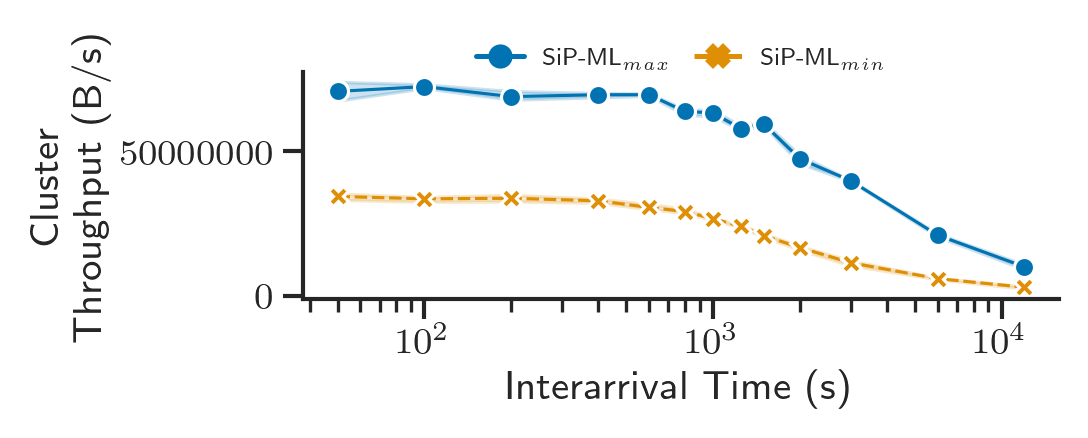

Plotting metric mean_demand_total_throughput -> min=1669591.8842178534 | max=28147205.09418352 | mean=15324250.7811238


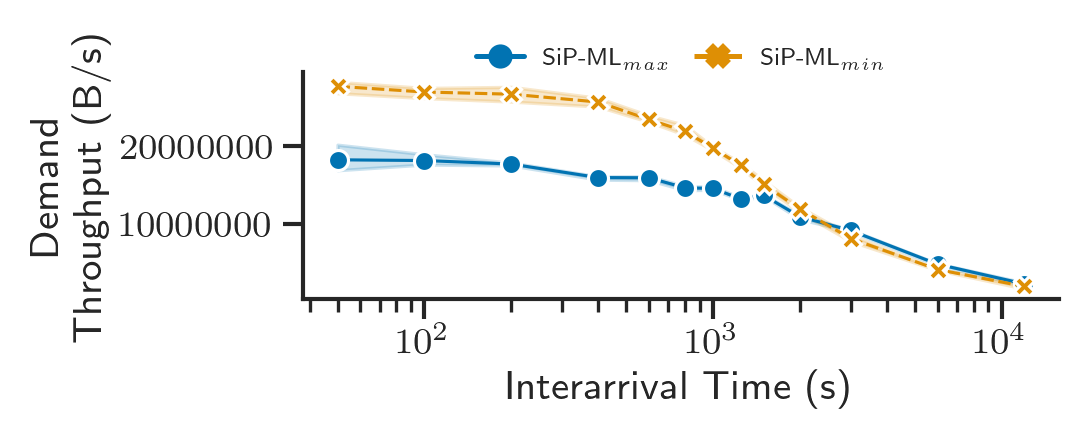

Plotting metric blocking_rate -> min=0.011976047904191617 | max=0.9735013249337533 | mean=0.4849295969092131


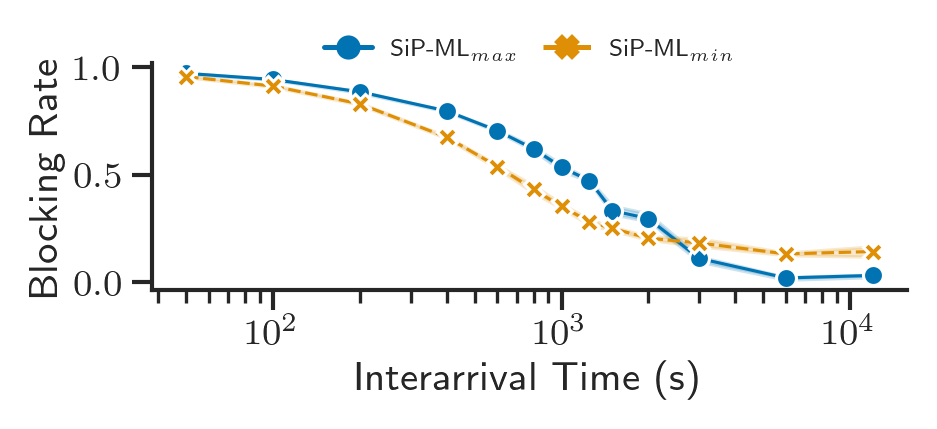

Plotting metric job_completion_time -> min=3266.3923535672625 | max=16695.020795378023 | mean=8997.469548682322


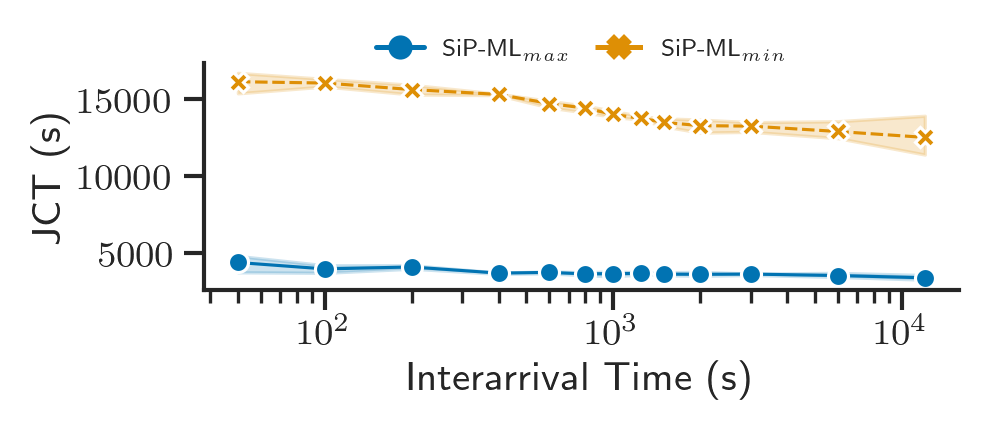

In [150]:
metrics = ['mean_cluster_throughput', 'mean_demand_total_throughput', 'blocking_rate']
for metric in metrics:
    lineplot(df=episode_stats_df, metric=metric)
    
metrics = ['job_completion_time']
for metric in metrics:
    lineplot(df=episode_completion_stats_df, metric=metric)